In [42]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('..'))
from knn import KNN
from load_imgs import batch_img
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# Loading raw data


In [1]:

pet_dir = "D:\Computer Science\TCC Ciência e Tecnologia\Data\Perdidos_square_cut"

x_test_filenames = ["CrQNWEKOzPI.pet1_f4.jpg", "CzqjdJRrIMN.pet1_f3.jpg"]

x_test_paths = [(pet_dir + "\\" + filename) for filename in x_test_filenames]
true_labels = ["CrQNWEKOzPI.pet1", "CzqjdJRrIMN.pet1"]


post_id_freq = {}

pet_id_freq = {}

train_labels = []

x_train_filenames = []

for filename in os.listdir(pet_dir):

    x_train_filenames.append(filename)

    photo_id = ".".join(filename.split(".")[0: -1])

    post_id = filename.split(".")[0]

    pet_id = "_".join(photo_id.split("_")[0 : -1])

    
    post_id_freq[post_id] = post_id_freq.get(post_id, 0) + 1
    pet_id_freq[pet_id] = pet_id_freq.get(pet_id, 0) + 1

    if((pet_dir + "\\" + filename) not in x_test_paths):
        train_labels.append(pet_id)
    
train_labels.sort()
post_img_freq_df = pd.DataFrame(list(post_id_freq.items()), columns=['Post ID', 'Images'])
pet_freq_df = pd.DataFrame(list(pet_id_freq.items()), columns=['Pet ID', 'Images'])
print(post_img_freq_df.sort_values("Images", ascending=False))
print(pet_freq_df.sort_values("Images", ascending=False))

x_train_paths = [(pet_dir + "\\" + filename) for filename in x_train_filenames]

display(pet_freq_df)

NameError: name 'os' is not defined

In [62]:
test_img, _ = batch_img(data_paths=x_test_paths)
train_img, _ = batch_img(data_dir=pet_dir, skip_files=x_test_filenames)

In [63]:
x_gray_test_img, _ = batch_img(data_paths=x_test_paths, grayscale=True)
x_gray_train_img, x_train_filenames = batch_img(data_dir=pet_dir, skip_files=x_test_filenames, grayscale=True)

# Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# fit and transform on the training data
train_labels_encoded = le.fit_transform(train_labels)

# transform the test data
true_labels_encoded = le.transform(true_labels)


# Testing My Own k-nn


In [132]:
# knn = KNN(dataset=x_train_img, k=5, distType="l2", labels=np.arange(len(train_labels)))

In [133]:


# knn = KNN(dataset=x_train_img, k=5, distType="l2", labels=train_labels)


# pred = knn.classify(x_test_img[1])

# highest_class, max_freq, prob, weights = pred['top1'].values()
# k_neighbors = pred['k_neighbors']

# print(f"Knn preveu {highest_class}, label real: {true_labels[0]}")


# plt.axis('off')
# plt.imshow(x_test_img[1].reshape(500, 500, 3))
# plt.show()

# plt.axis('off')
# plt.imshow(Image.open(f"{pet_dir}\\{highest_class}_f1.jpg"))
# plt.show()

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import local_binary_pattern
from skimage.util import view_as_blocks

In [136]:
# lbp_image = local_binary_pattern(x_test_img[0], 8, 2, method='uniform')

# values, counts = np.unique(lbp_image, return_counts=True)



# lbp_image2 = local_binary_pattern(x_train_img[0], 8, 2, method='uniform')

imgs_col = np.vstack([
    np.array([1, 1, 2, 3, 5, 5, 5]), 
    np.array([1, 3, 5, 5, 8, 0, 0])
])



values = np.unique(imgs_col, )

# create table where values are the columns and the rows are the images
# each cell is the frequency of the value in the image


[0 1 2 3 5 8]


In [85]:
num_points = 8
# max_feat_val = 2**(num_points) - 1
max_feat_val = num_points + 1

lbp_test_img = np.array([local_binary_pattern(img, num_points, 2, method='uniform') for img in x_gray_test_img ])
lbp_train_img = np.array([local_binary_pattern(img, num_points, 2, method='uniform') for img in x_gray_train_img ])



In [135]:
train_feats = []

block_size = (100, 100)

for i, lbp in enumerate(lbp_train_img):

    img_blocks = view_as_blocks(lbp, block_size)

    img_blocks = img_blocks.reshape(-1, block_size[0] * block_size[1])
    
    # img_blocks = [lbp]

    img_hists = [np.histogram(block, bins=np.arange(max_feat_val+2)) for block in img_blocks]


    train_feat = np.concatenate([hist[0] for hist in img_hists])

    train_feats.append(train_feat)

train_feats = np.array(train_feats)


In [132]:
train_feats.shape

(175, 10)

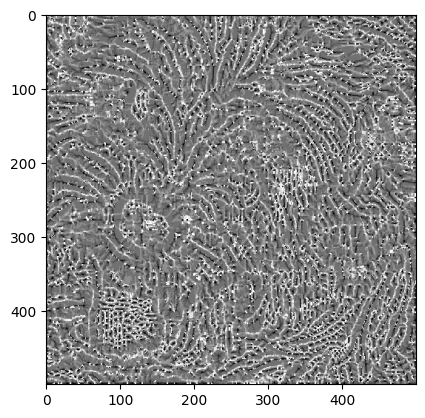

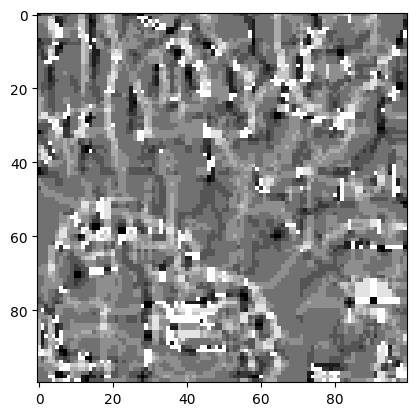

25


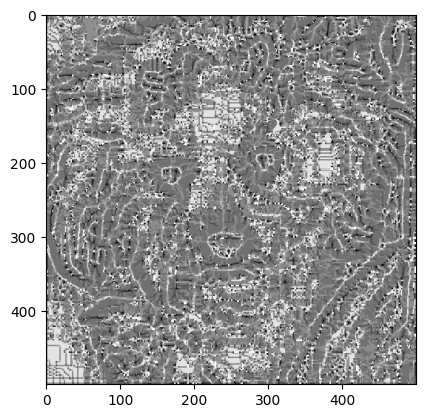

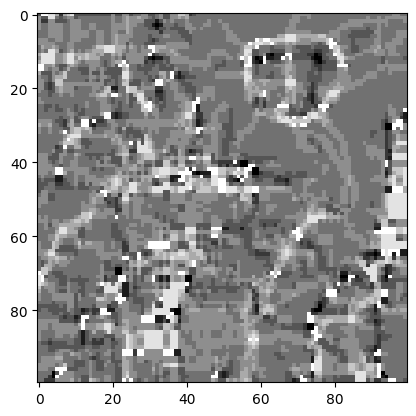

25


In [146]:
test_feats = []

block_size = (100, 100)

for i, lbp in enumerate(lbp_test_img):

    img_blocks = view_as_blocks(lbp, block_size)

    plt.imshow(lbp, cmap='gray')
    plt.show()
    plt.imshow(img_blocks[2, 1], cmap='gray')
    plt.show()

    img_blocks = img_blocks.reshape(-1, block_size[0] * block_size[1])

    # print(img_blocks.shape)

    # img_blocks = [lbp]

    img_hists = [np.histogram(block, bins=np.arange(max_feat_val+2)) for block in img_blocks]

    print(len(img_hists))

    test_feat = np.concatenate([hist[0] for hist in img_hists])

    test_feats.append(test_feat)

test_feats = np.array(test_feats)


In [95]:
for i, lbp in enumerate(lbp_train_img):

    # save in dir
    plt.imsave(f"D:\Computer Science\TCC Ciência e Tecnologia\Data\Perdidos_rect_cut_lbp\{x_train_filenames[i]}", lbp, cmap='gray')

In [70]:
for i, lbp in enumerate(lbp_test_img):

    # save in dir
    plt.imsave(f"D:\Computer Science\TCC Ciência e Tecnologia\Data\Perdidos_rect_cut_lbp\{x_test_filenames[i]}", lbp, cmap='gray')  

In [147]:
test = np.concatenate([
    test_img.reshape(test_img.shape[0], -1),
    lbp_test_img.reshape(lbp_test_img.shape[0], -1),
    test_feats
], axis=1)
test = test.reshape(test_img.shape[0], -1)

train = np.concatenate([
    train_img.reshape(train_img.shape[0], -1),
    lbp_train_img.reshape(lbp_train_img.shape[0], -1),
    train_feats
], axis=1)

train = train.reshape(train.shape[0], -1)


In [148]:
knn = KNeighborsClassifier(n_neighbors=11, metric='l1',  )
knn.fit(train, train_labels_encoded)

encoded_pred = knn.predict(test)
score = knn.score(test, true_labels_encoded)



pred = le.inverse_transform(encoded_pred)
print(f"Knn results: {pred == true_labels}")


Knn results: [False  True]


In [ ]:

plt.imshow(test_img[0].reshape(500, 500, 3))
plt.show()


plt.axis('off')
plt.imshow(Image.open(f"{pet_dir}\\{pred}_f1.jpg"))
plt.show()
print(score)